# Importer les librairies

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Fonctions générales

In [33]:
def cohen(x,y, t):
    return (t*np.sqrt((x+y)/(x*y)))

# Importer les données

In [34]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [35]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:

    """La fonction prépare les données à l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """

    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed = data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna()

    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed = data_preprocessed.drop(columns=["SibSp", "Parch"])

    # Recalculer le prix du billet
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(
        data_preprocessed,
        columns=["Sex", "Embarked"],
        drop_first=True,
        dtype=int
    )



    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [36]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


In [37]:
data_clean.describe()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,20.736106,1.946629,0.636236,0.039326,0.778090
std,0.491139,0.836854,14.492933,37.544783,1.485027,0.481420,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,7.318750,1.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,9.225000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,26.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,8.000000,1.000000,1.000000,1.000000


## 2. Inférence statistique (4 pts)

### Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans) ?

#### Q1.1. Identifier la ou les variables d'intérêt et spécifier le type.

Variable *Age*, type *Quantitatif, continue*

#### Q1.2. Réaliser une visualisation appropriée selon la ou les variables.

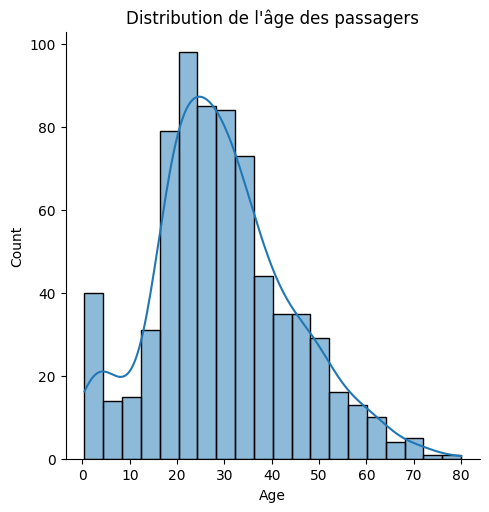

In [38]:
sns.displot(
    data=data_clean,
    x="Age",
    kde=True
)
plt.title("Distribution de l'âge des passagers")
plt.show()

#### Q1.3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**H0:** L'âge moyen des passagers est *identique* à celui de la population en 1912 (28 ans).  
**H1:** L'âge moyen des passagers est *différent* de celui de la population en 1912 (28 ans).

#### Q1.4. Identifier le test statistique approprié selon les hypothèses énoncées.

Nous devons réaliser un t-test (car nous n'avons pas l'écart type de la population de 1912) pour comparer la moyenne de l'age de notre échantillon à celle de la population en 1912.

#### Q1.5. Vérifier la validation des assumptions selon le test identifié.

1. *Les échantillons sont aléatoires.*  
    L'échantillon fourni représente un peu plus d'un tiers des passagers du Titanic. A priori cet échantillon n'est pas aléatoire au sens statistique, mais suffisament représentatif de la population du titanic (https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf).
    Nous avons retiré 180 lignes incomplétes.  
2. *La taille de l'échantillon est supérieur à 30 et la population est normalement distribué.*  
    Notre échantillon est supérieur à 30 et la population est proche de normalement distribuée.

#### Q1.6. Calculer la statistique ainsi que la p-valeur.

In [39]:
mean_1912_population_age = 28
print("Moyenne age titanic : ", np.mean(data_clean["Age"]))

t, p_value = stats.ttest_1samp(data_clean["Age"], popmean=mean_1912_population_age)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_value))

nb_Titanic_Population = data_clean["Age"].std()
#Estimation de la population mondiale en 1912, source : https://en.wikipedia.org/wiki/World_population
nb_World_Population_1912 = 1800000000
d_effec_size = cohen(nb_Titanic_Population, nb_World_Population_1912, t)
print("La taille de l'effet est de selon la formule du d de Cohen : " + str(d_effec_size))

Moyenne age titanic :  29.64209269662921
La statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662
La taille de l'effet est de selon la formule du d de Cohen : 0.7941512902666406


#### Q1.7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [40]:
"On rejette l'hypothèse nulle" if p_value < 0.05 else "On ne rejette pas l'hypothèse nulle"

"On rejette l'hypothèse nulle"

#### Q1.8. Interpréter le résultat et évaluer la taille de l'effet.

Nous constatons que : la p-value obtenue est faible, **0.0025**. Ce qui doit nous amener a la rejeter en considérant un seuil à 0.05.
Aussi, la taille de l'effet est considérée comme élevée : **0.79**.

Pour rappel, la moyenne d'age du titanic est de **1.6** année supérieure a la moyenne mondiale de 1912. Cette différence, bien que paraissant faible en valeur absolue, est une différence statistiquement significative aux yeux du t-test effectué.

En d'autres termes, une p-value de **0.0025** nous laisse penser que l'hypothèse nulle proposée n'est pas une hypothèse satisfaisante aux yeux des données analysées.

Etant donné la petite population du titanic en regard de la taille de la population mondiale, nous comprenons pourquoi la taille de l'effet est si élevée. Malgré la faible différence absolue de moyenne, avoir 1.6 ans supplémentaire semble nécecessiter une explications plus poussée. Cela peut nous laisser penser que la population du titanic n'est a priori pas réprésentative de la population mondiale de 1912. Il faudrait tester un certain nombre d'autres hypothèses pour orienter notre réflexion. Il serait alors peut être possible de trouver des explications à cette différence d'age moyenne.

### Q2: La survie dépend-elle de la classe du passager ?

#### Q2.1. Identifier la ou les variables d'intérêt et spécifier le type.

Il nous faudra la variable `Pclasss` ainsi que la variable `Survived`. La première est qualitative ordinale, et la seconde est qualitative nominale.

#### Q2.2. Réaliser une visualisation appropriée selon la ou les variables.

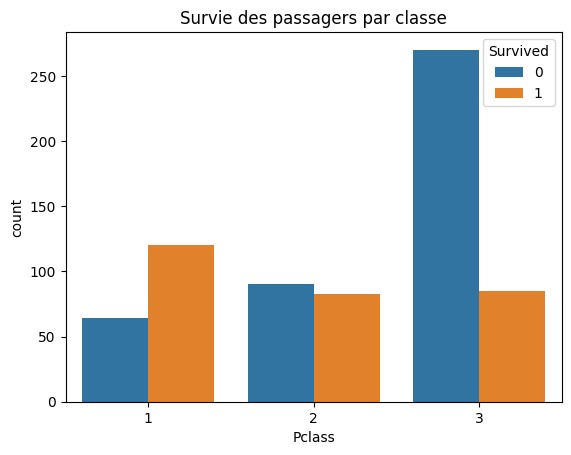

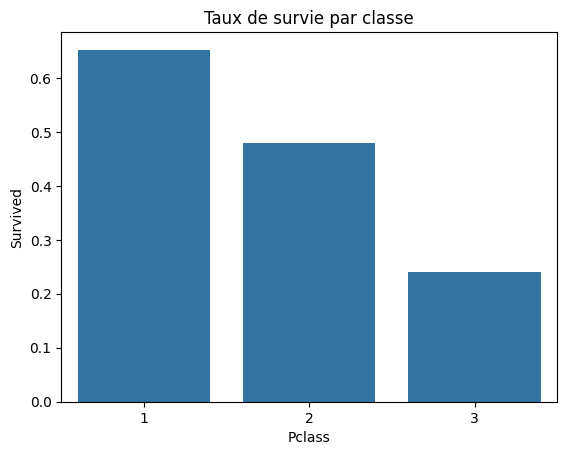

In [41]:
sns.countplot(
    data=data_clean,
    x="Pclass",
    hue="Survived"
)
plt.title("Survie des passagers par classe")
plt.show()

sns.barplot(
    data=data_clean,
    x="Pclass",
    y="Survived",
    errorbar=None
)
# Display percentage on bars
plt.title("Taux de survie par classe")
plt.show()

#### Q2.3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

*H0:* La survie ne dépend pas de la classe des passagers.  
*H1:* La survie dépend de la classe des passagers.

#### Q2.4. Identifier le test statistique approprié selon les hypothèses énoncées.

Le test chi2 nous permettra de tester la dépendance entre les variables `Pclass` et `Survived`.

#### Q2.5. Vérifier la validation des assumptions selon le test identifié.

1. *Les échantillons sont aléatoires.*  
    L'échantillon fourni représente un peu plus d'un tiers des passagers du Titanic. A priori cet échantillon n'est pas aléatoire au sens statistique, mais suffisament représentatif de la population du titanic (https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf).
    Nous avons retiré 180 lignes incomplétes.
2. *5 valeurs minimum par combinaisons de variables.*  
    Nous avons plus de 50 valeurs par combinaisons.

#### Q2.6. Calculer la statistique ainsi que la p-valeur.

In [42]:
chi2, p_value, dof, _ = stats.chi2_contingency(
    pd.crosstab(data_clean["Pclass"], data_clean["Survived"])
)
# Cramer's V, to calculate the effect size
effect_size = np.sqrt(chi2 / (data_clean.shape[0] * (min(data_clean.shape) - 1)))

print("La statistique chi2 est de : " + str(chi2))
print("La p-valeur associée est de : " + str(p_value))
print("Le degré de liberté est de : " + str(dof))
print("La taille de l'effet est de : " + str(effect_size))

La statistique chi2 est de : 91.08074548791019
La p-valeur associée est de : 1.6675060315554636e-20
Le degré de liberté est de : 2
La taille de l'effet est de : 0.13518368210284873


#### Q2.7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [43]:
"On rejette l'hypothèse nulle" if p_value < 0.05 else "On ne rejette pas l'hypothèse nulle"

"On rejette l'hypothèse nulle"

#### Q2.8. Interpréter le résultat et évaluer la taille de l'effet.

La p-value obtenue est particulièrement faible, cela nous amêne a rejeter l'hypothèse nulle. Ces valeurs nous montrent qu'il y a vraisemblament des facteurs qui agissent sur la survie des passageers, dans notre cas, la classe du passager. Afin d'en avoir le coeur net, il serait intéressant de tester un certains nobre d'hypothèses pour mieux comprendre les facteurs qui influent sur la survie des passagers.
En effet, il n'est pas impossible que des facteurs de confusion soient présents, par exemple, on peut imaginer que le placement des quartiers première classe est plus proche des canots, dans ce cas, la classe nous indiquerait une tendance, mais ne serait pas la réelle cause de la survie ou non.

Pour finir, la taille de l'effet est faible (moins de 0.2), cela nous indique q'il semble que nos deux variables, malgré une p-value faible, ne sont pas fortement liées. Cela peut d'avantage apuier l'idée que la classe n'est potentiellement pas le facteur direct ou principal de la survie des passagers.

### Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés ?

#### Q3.1. Identifier la ou les variables d'intérêt et spécifier le type.

La variable `Survived` est qualitative nominale, et la variable `Age` est quantitative continue.

#### Q3.2. Réaliser une visualisation appropriée selon la ou les variables.

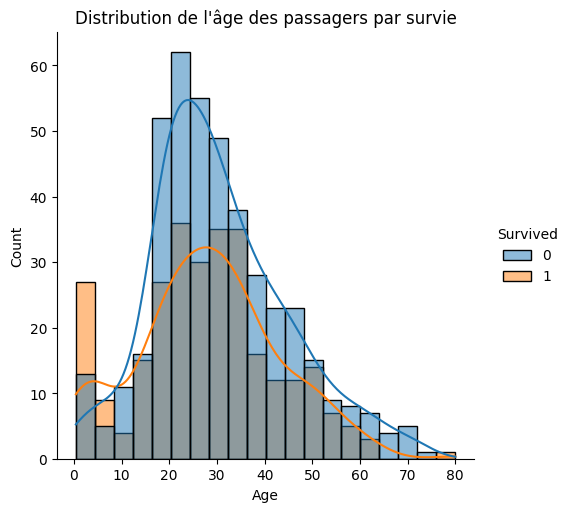

In [44]:
# Graph with one distribution per survival status
sns.displot(
    data=data_clean,
    x="Age",
    hue="Survived",
    kde=True
)
plt.title("Distribution de l'âge des passagers par survie")
plt.show()

#### Q3.3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

*H0:* L'age n'influence pas le taux de survie des passagers.  
*H1:* L'age influence le taux de survie des passagers.

#### Q3.4. Identifier le test statistique approprié selon les hypothèses énoncées.

Nous pouvons réaliser un t-test a 2 échantillons, afin de comparer les moyenne d'age des survivants aux décédés.

#### Q3.5. Vérifier la validation des assumptions selon le test identifié.

1. *Les échantillons sont aléatoires.*  
    L'échantillon fourni représente un peu plus d'un tiers des passagers du Titanic. A priori cet échantillon n'est pas aléatoire au sens statistique, mais suffisament représentatif de la population du titanic (https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf).
    Nous avons retiré 180 lignes incomplétes.
2. *Les échantillons sont indépendants.*  
    Nos 2 échantillons sont indépendants.
3. *La taille des l'échantillon est supérieur à 30 et la population est normalement distribué.*  
    Nos échantillons sont supérieurs à 30 et la population est proche de normalement distribuée.

#### Q3.6. Calculer la statistique ainsi que la p-valeur.

In [45]:
t, p_value = stats.ttest_ind(
    data_clean.loc[data_clean["Survived"] == 1, "Age"],
    data_clean.loc[data_clean["Survived"] == 0, "Age"]
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_value))

La statistique t est de : -2.2043427748445956
La p-valeur associée est de : 0.027820316250851285


#### Q3.7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [46]:
"On rejette l'hypothèse nulle" if p_value < 0.05 else "On ne rejette pas l'hypothèse nulle"

"On rejette l'hypothèse nulle"

#### Q3.8. Interpréter le résultat et évaluer la taille de l'effet.

### Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets ?

#### Q4.1. Identifier la ou les variables d'intérêt et spécifier le type.

La deux variables `Age` et `Fare` sont quantitatives continues.

#### Q4.2. Réaliser une visualisation appropriée selon la ou les variables.

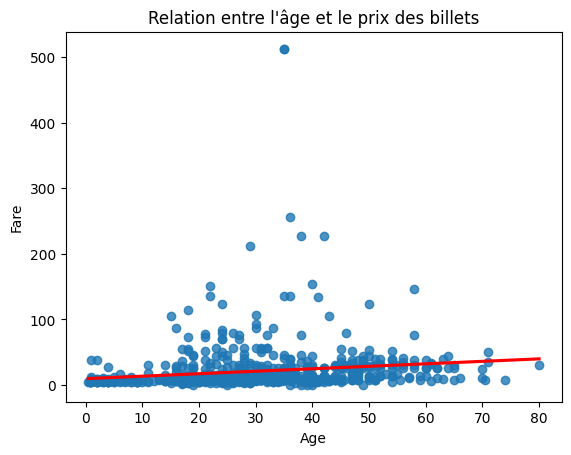

In [47]:
sns.regplot(
    data=data_clean,
    x="Age",
    y="Fare",
    ci=None,
    line_kws={"color": "red"}
)
plt.title("Relation entre l'âge et le prix des billets")
plt.show()

#### Q4.3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

*H0:* Nous n'observons pas de relation entre l'age et le prix des billets.  
*H1:* Nous observons une relation entre l'age et le prix des billets.

#### Q4.4. Identifier le test statistique approprié selon les hypothèses énoncées.

Il nous faut réaliser un test de corrélation entre les 2 variables.

#### Q4.5. Vérifier la validation des assumptions selon le test identifié.

1. *Les 2 variables doivent être quantitatives.* OK
2. *Les données doivent être approximativement liées linéairement.* A priori pas, ou trop faiblement.
3. *Les résidus de la régression linéaire sont indépendants* Oui.
4. *Les résidus de la régression linéaire sont normalement distribués* Oui.
5. *Les résidus de la régression linéaire sont distribuées de façon homogène* Oui.

#### Q4.6. Calculer la statistique ainsi que la p-valeur.

A priori la relation n'est pas linéaire car nous ne remplissons pas les assumptions. Cependant, nous pouvons réaliser un test de corrélation pour l'essai :

In [48]:
# Correlation test
corr = data_clean.corr()["Age"]["Fare"]
print("La corrélation entre l'age et le prix des billets est de : " + str(corr))

La corrélation entre l'age et le prix des billets est de : 0.14563315923055964


Une corrélation en dessous de 0.3 est considérée comme faible. Sachant que nous ne respectons pas totalement les assumptions, nous ne pouvons pas conclure sur la relation entre l'age et le prix des billets.

#### Q4.7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

Nous n'avons pas de p-valeur a calculer car nous ne respectons pas les assumptions, il n'y a donc pas de corrélation significative entre l'age et le prix des billets.

#### Q4.8. Interpréter le résultat et évaluer la taille de l'effet.


### Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

### Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.

### Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

### Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.

# Sources statistiques
https://www.researchgate.net/figure/Effect-size-Cramers-V-for-the-survival-of-Titanic-passengers-by-class-position-Titanic_tbl1_370188870